**Mini Projeto Covid**

## Importação das Bibliotecas

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

!pip install unidecode
from unidecode import unidecode

     |████████████████████████████████| 245kB 7.8MB/s 


## Importação dos dados

In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/My Drive/Mini Projeto Covid/'

# Arquivo epidemiológico da SESAP
# input_file = folder+'DOC000000000234175.xlsx'
#input_file = folder+'Versao-unificada_14_12-1.xlsx'
input_file = folder+'Versao-unificada_23_12.xlsx'

# Carregar arquivo epidemiológico da SESAP
# data_epid = pd.read_csv(input_file,low_memory=False)
data_epid = pd.read_excel(input_file)

Mounted at /content/drive


In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/My Drive/Mini Projeto Covid/'

# Arquivo epidemiológico da SESAP
# input_file = folder+'DOC000000000234175.xlsx'
#input_file = folder+'Versao-unificada_14_12-1.xlsx'
input_file = folder+'Versao-unificada_21_12.xlsx'

# Carregar arquivo epidemiológico da SESAP
# data_epid = pd.read_csv(input_file,low_memory=False)
data_epid = pd.read_excel(input_file)

In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/My Drive/Mini Projeto Covid/'

# Arquivo epidemiológico da SESAP
# input_file = folder+'DOC000000000234175.xlsx'
#input_file = folder+'Versao-unificada_14_12-1.xlsx'
input_file = folder+'Versao-unificada_21_12.xlsx'

# Carregar arquivo epidemiológico da SESAP
# data_epid = pd.read_csv(input_file,low_memory=False)
data_epid = pd.read_excel(input_file)

In [ ]:
# Arquivo com a distribuição da população por faixa etária (de 5 em 5 anos)
dist_faixa_etaria_5 = pd.read_csv('/content/drive/MyDrive/Mini Projeto Covid/A151922189_28_143_208.csv',
                                  sep=';', header=5, encoding='latin1', skiprows=[23,24,25,26], names=['faixa_etaria','populacao_residente'])
dist_faixa_etaria_5

,faixa_etaria,populacao_residente
0,De 0 a 4 anos,237720
1,De 5 a 9 anos,244661
2,De 10 a 14 anos,257979
3,De 15 a 19 anos,272210
4,De 20 a 24 anos,296079
5,De 25 a 29 anos,296133
6,De 30 a 34 anos,308197
7,De 35 a 39 anos,288451
8,De 40 a 44 anos,253221
9,De 45 a 49 anos,222363


In [ ]:
# Arquivo com a distribuição da população por faixa etária (de 10 em 10 anos)
dist_faixa_etaria_10 = pd.read_csv('/content/drive/MyDrive/Mini Projeto Covid/A151850189_28_143_208.csv',
                                   sep=';', header=5, encoding='latin1', skiprows=[15,16,17,18], names=['faixa_etaria','populacao_residente'])
dist_faixa_etaria_10

,faixa_etaria,populacao_residente
0,0 a 9 anos,482381
1,10 a 19 anos,530189
2,20 a 29 anos,592212
3,30 a 39 anos,596648
4,40 a 49 anos,475584
5,50 a 59 anos,395294
6,60 a 69 anos,240232
7,70 a 79 anos,146715
8,80 anos e mais,74910


## Funções

In [ ]:
# Função para padronização das datas
def microsoft_to_iso8601(microsoft):
  try:
    base_date = datetime(1899, 12, 31)
    ret_date = base_date + timedelta(days=microsoft)
    return ret_date.isoformat()
  except:
    if microsoft == '#NULL!':
      return np.nan
    elif microsoft == 'NI':
      return np.nan
    else:
      return microsoft

# Função para padronização das faixas etárias (de 5 em 5 anos)
def organizar_faixa_cinco_anos(row):
    try:
      idade = int(row['IDADE'])
      if idade < 5:
        return "0 a 4"
      elif idade < 10:
        return "5 a 9"
      elif idade < 15:
        return "10 a 14"
      elif idade < 20:
        return "15 a 19"
      elif idade < 25:
        return "20 a 24"
      elif idade < 30:
        return "25 a 29"
      elif idade < 35:
        return "30 a 34"
      elif idade < 40:
        return "35 a 39"
      elif idade < 45:
        return "40 a 44"
      elif idade < 50:
        return "45 a 49"
      elif idade < 55:
        return "50 a 54"
      elif idade < 60:
        return "55 a 59"
      elif idade < 65:
        return "60 a 64"
      elif idade < 70:
        return "65 a 69"
      elif idade < 75:
        return "70 a 74"
      elif idade < 80:
        return "75 a 79"
      else:
        return ">= 80"
    except:
      return np.nan

# Função para padronização das faixas etárias (de 10 em 10 anos)
def organizar_faixa_dez_anos(row):
    try:
      idade = int(row['IDADE'])
      if idade < 10:
        return "0 a 9"
      elif idade < 20:
        return "10 a 19"
      elif idade < 30:
        return "20 a 29"
      elif idade < 40:
        return "30 a 39"
      elif idade < 50:
        return "40 a 49"
      elif idade < 60:
        return "50 a 59"
      elif idade < 70:
        return "60 a 69"
      elif idade < 80:
        return "70 a 79"
      else:
        return ">= 80"
    except:
      return np.nan

def normalizarColunas(col):
  try:
    valor = (col - col.mean())/col.std()
    return valor
  except:
    return col

def padronizarColunaData(row): # considerar data dos sintomas, se não houver utilizar a data de coleta
  data_s = row['DATA_SINTOMAS']
  data_c = row['DATA_COLETA_TESTE']
  data_n = row['DATA_NOTIFICACAO']
  if data_s == data_s:
    return data_s
  #elif data_c == data_c:
  #  return data_c
  #elif data_n == data_n:
  #  return data_n


## Limpeza dos dados

In [ ]:
# Realizar cópia do data_epid
data_epid_analises = data_epid.copy()

# Obter apenas os casos confirmados
data_epid_analises = data_epid_analises[data_epid_analises['NOVA_CLASS']==3]

# Padronizar a nomeação das colunas
data_epid_analises.columns = [unidecode(x).upper() for x in data_epid_analises]

# Selecionar colunas pertinentes às análises
data_epid_analises = data_epid_analises[['DATADOINICIODOSSINTOMAS',
                                         'DATADANOTIFICACAO',
                                         'DATADACOLETADOTESTE',
                                         'NOVA_RESUL',
                                         'OBITO',
                                         'IDADE']]
# Renomear as colunas
data_epid_analises.rename(columns = {
    'DATADOINICIODOSSINTOMAS':'DATA_SINTOMAS',
    'DATADANOTIFICACAO':'DATA_NOTIFICACAO',
    'DATADACOLETADOTESTE':'DATA_COLETA_TESTE',
    'NOVA_RESUL':'RESULTADO_TESTE'}, inplace = True)

# Padronizar registros nas seguintes colunas: EVOLUCAO, RESULTADO_TESTE
for column in ['RESULTADO_TESTE','OBITO']:
  data_epid_analises[column].fillna('NAO INFORMADO', inplace=True)
  data_epid_analises[column].replace(' ', 'NAO INFORMADO', inplace=True)
  data_epid_analises[column] = [unidecode(x).upper() for x in data_epid_analises[column]]
  data_epid_analises[column].replace('NI', 'NAO INFORMADO', inplace=True)

# Definindo coluna com a soma de positivos
data_epid_analises['RESULTADO_POSITIVO'] = data_epid_analises['RESULTADO_TESTE'].str.contains('POSITIVO', na = False)

# Definindo coluna com a soma de obitos
data_epid_analises['OBITO_POSITIVO'] = data_epid_analises['OBITO'].str.contains('OBITO', na = False)

# Padronizar datas
data_epid_analises['DATA_SINTOMAS_COLETA'] = data_epid_analises.apply(padronizarColunaData, axis=1)


In [ ]:
# Cópia para aplicar faixa etária
data_epid_analises_5 = data_epid_analises.copy()
# Aplicar função de padronização da faixa etária, de 5 em 5 anos
data_epid_analises_5["FAIXA_ETARIA"] = data_epid_analises_5.apply(organizar_faixa_cinco_anos, axis=1)

In [ ]:
# Cópia para aplicar faixa etária
data_epid_analises_10 = data_epid_analises.copy()
# Aplicar função de padronização da faixa etária, de 10 em 10 anos
data_epid_analises_10["FAIXA_ETARIA"] = data_epid_analises_10.apply(organizar_faixa_dez_anos, axis=1)

## Resultados

### Casos Confirmados

#### Quantidade Total

##### Faixa Etária: de 5 em 5 anos

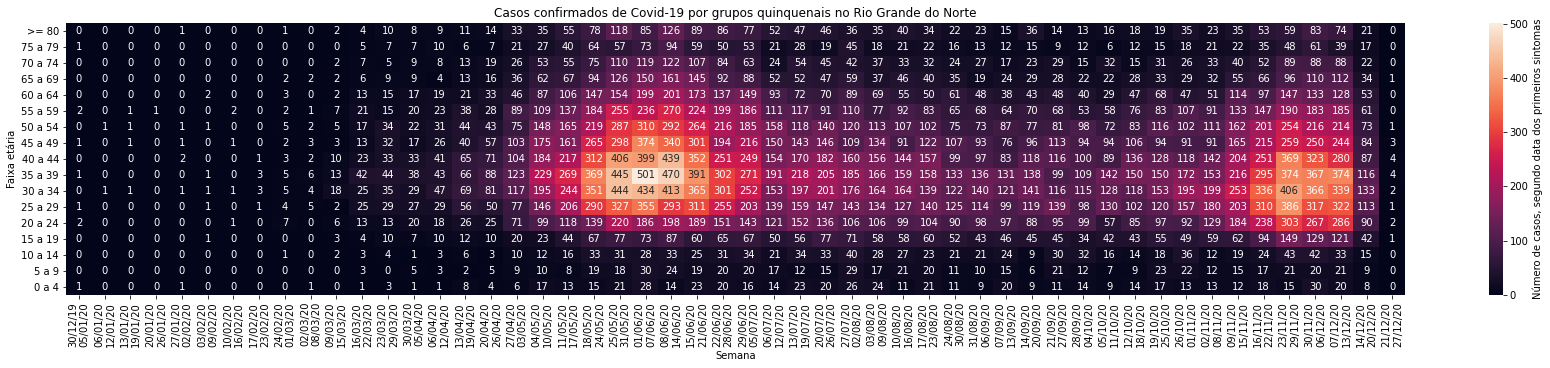

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(30,5))
ax = sns.heatmap(table_mini, annot=True, fmt='d', cbar_kws={'label': 'Número de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Casos confirmados de Covid-19 por grupos quinquenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

##### Faixa Etária: de 10 em 10 anos

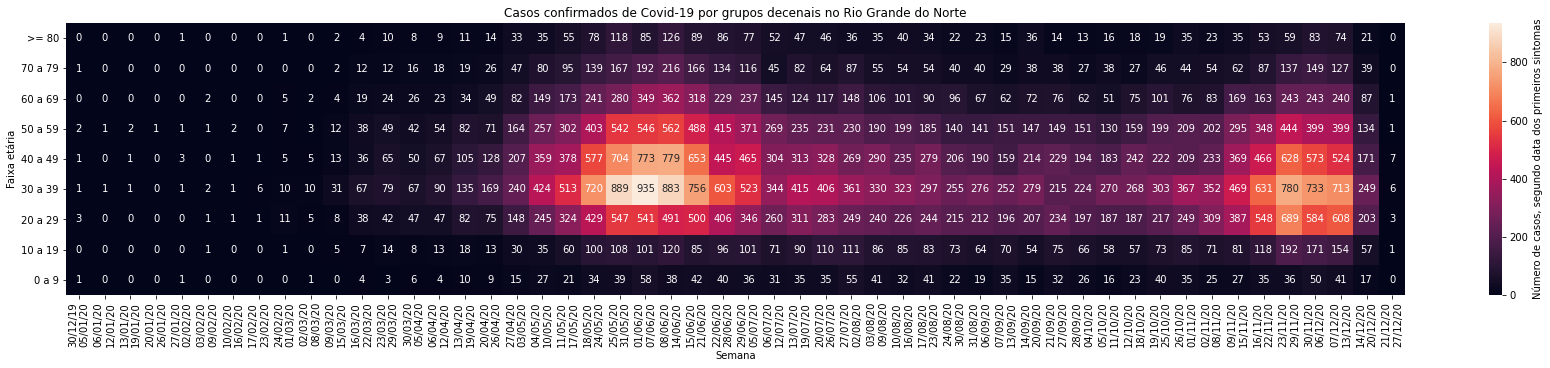

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(30,5))
ax = sns.heatmap(table_mini, annot=True, fmt='d', cbar_kws={'label': 'Número de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Casos confirmados de Covid-19 por grupos decenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Quantidade Total Normalizada

##### Faixa Etária: de 5 em 5 anos

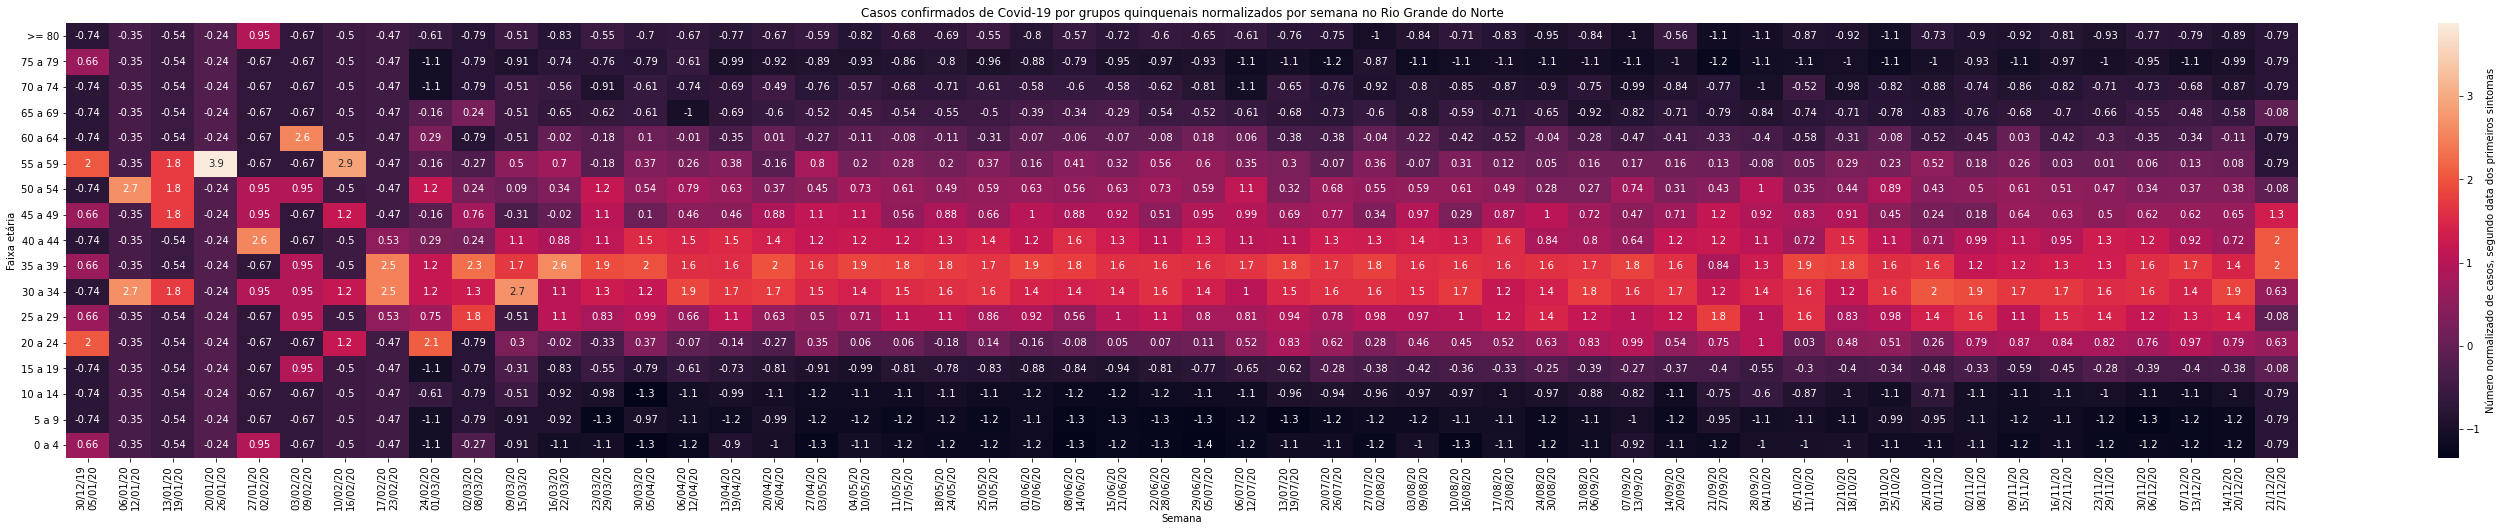

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Normalizar
table_mini_norm = table_mini.apply(normalizarColunas, axis=0)
table_mini_norm = table_mini_norm.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,8))
ax = sns.heatmap(table_mini_norm, annot=True, cbar_kws={'label': 'Número normalizado de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Casos confirmados de Covid-19 por grupos quinquenais normalizados por semana no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

##### Faixa Etária: de 10 em 10 anos

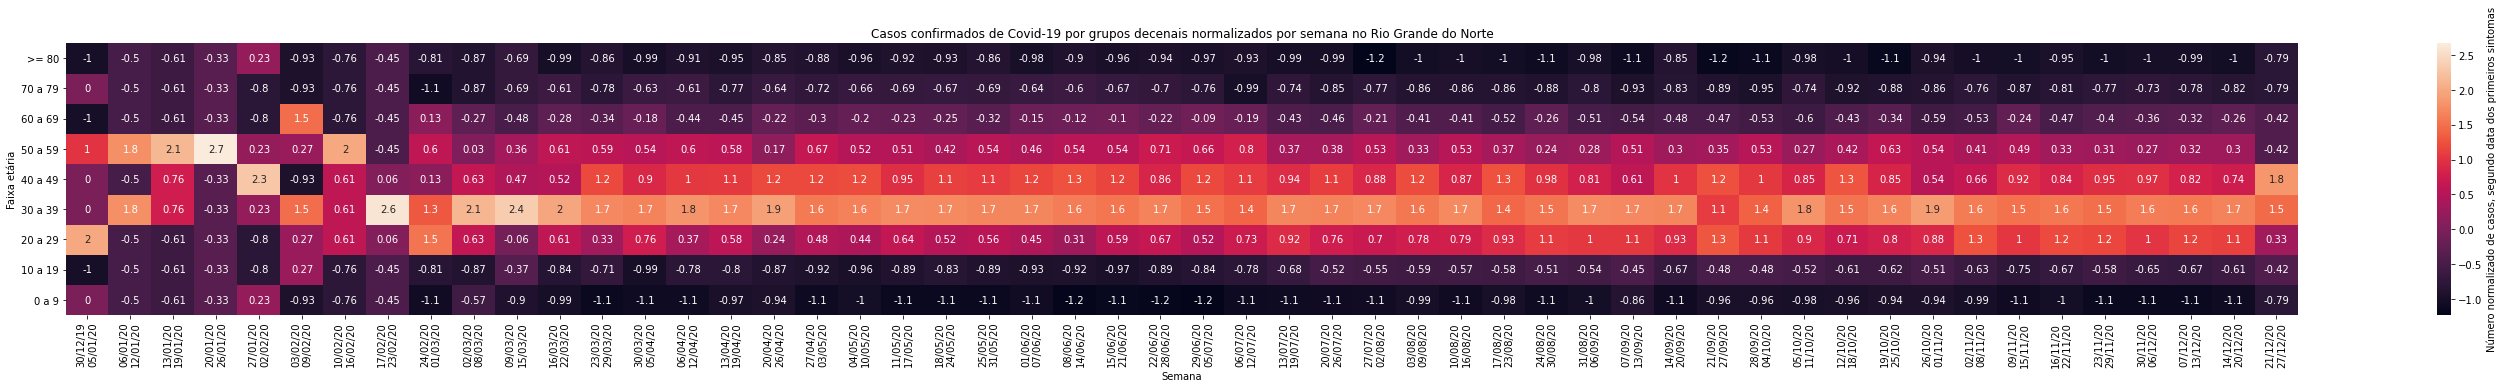

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Normalizar
table_mini_norm = table_mini.apply(normalizarColunas, axis=0)
table_mini_norm = table_mini_norm.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini_norm, annot=True, cbar_kws={'label': 'Número normalizado de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Casos confirmados de Covid-19 por grupos decenais normalizados por semana no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Taxa por Faixa Etária

##### Faixa Etária: de 5 em 5 anos

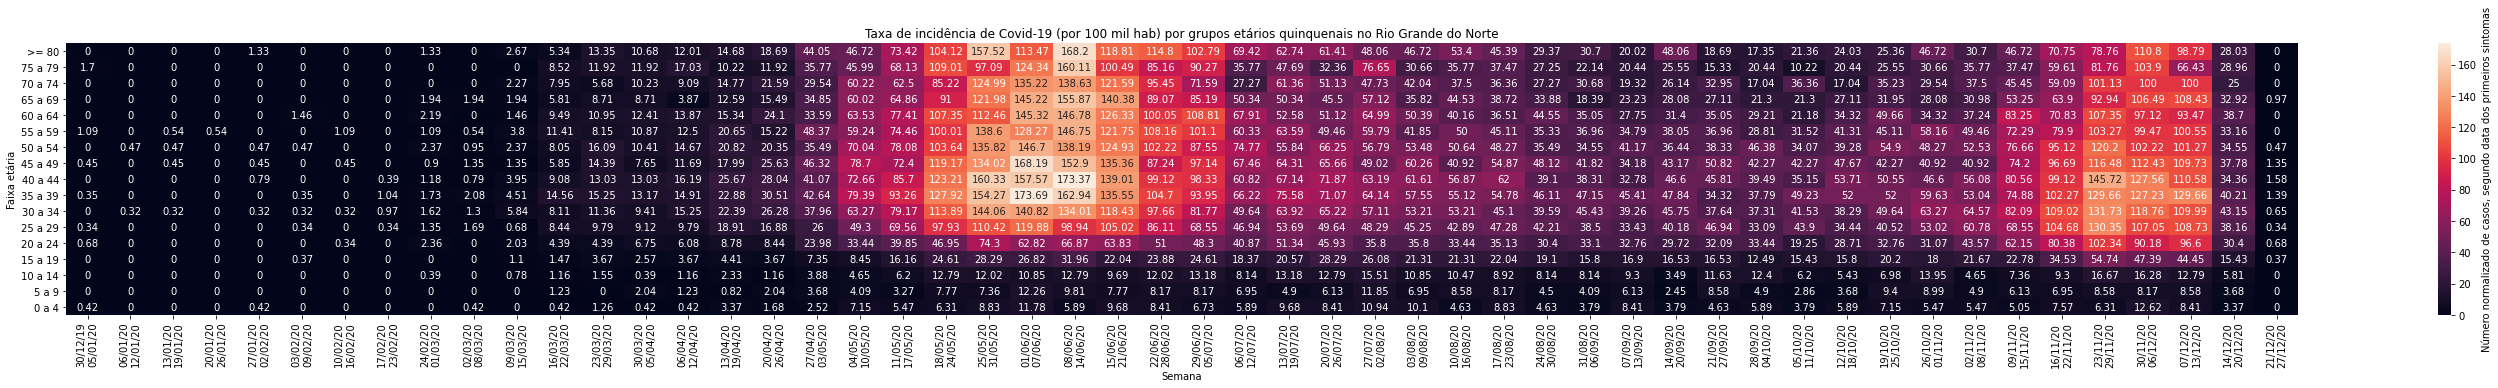

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Proporção
for column in table_mini.columns:
  table_mini[column] = table_mini[column].values/dist_faixa_etaria_5['populacao_residente'].values * 100000
table_mini = table_mini.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini, annot=True,fmt='g', cbar_kws={'label': 'Número normalizado de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Taxa de incidência de Covid-19 (por 100 mil hab) por grupos etários quinquenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.savefig(folder+'incidencia_05_heat_2312c.eps', format='eps')
plt.show(ax)


##### Faixa Etária: de 10 em 10 anos

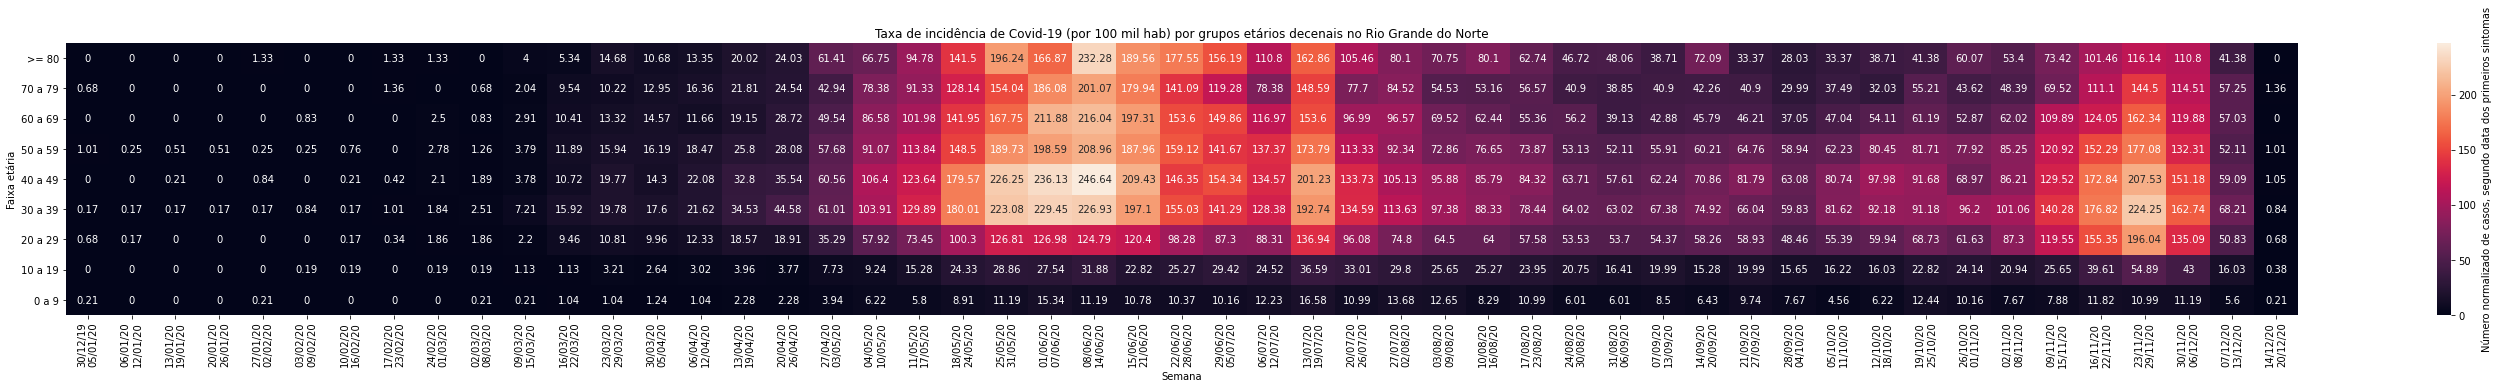

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['RESULTADO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['RESULTADO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Proporção
for column in table_mini.columns:
  table_mini[column] = table_mini[column].values/dist_faixa_etaria_10['populacao_residente'].values * 100000
table_mini = table_mini.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini, annot=True, fmt='g', cbar_kws={'label': 'Número normalizado de casos, segundo data dos primeiros sintomas'})
ax.invert_yaxis()
plt.title("Taxa de incidência de Covid-19 (por 100 mil hab) por grupos etários decenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Mediana dos casos confirmados por idade

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises["DATA_EPIDEMIOLOGICA"] = data_epid_analises['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises.sort_values('DATA_EPIDEMIOLOGICA')
data_epid_mini["DATA_EPIDEMIOLOGICA"] = data_epid_mini['DATA_EPIDEMIOLOGICA'].dt.strftime('%m/%y')

# Criar tabela principal
data_epid_mini = data_epid_mini[data_epid_mini['RESULTADO_POSITIVO'] == True]
data_epid_mini = data_epid_mini[data_epid_mini['IDADE'] != 'NI']
data_epid_mini.dropna(axis=0, inplace=True)
data_epid_mini = data_epid_mini.astype({'IDADE':'int64'})
table_epid_mini = data_epid_mini.groupby('DATA_EPIDEMIOLOGICA')['IDADE'].median().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini = table_epid_mini.astype({'IDADE':'int64'})
table_epid_mini.reset_index(drop=True, inplace=True)

table_epid_mini_mes = table_epid_mini

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises["DATA_EPIDEMIOLOGICA"] = data_epid_analises['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
data_epid_mini = data_epid_mini[data_epid_mini['RESULTADO_POSITIVO'] == True]
data_epid_mini = data_epid_mini[data_epid_mini['IDADE'] != 'NI']
data_epid_mini.dropna(axis=0, inplace=True)
data_epid_mini = data_epid_mini.astype({'IDADE':'int64'})
data_epid_mini['DATA_EPIDEMIOLOGICA'] = data_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = data_epid_mini.groupby(pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON'))['IDADE'].median().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini = table_epid_mini.astype({'IDADE':'int64'})
table_epid_mini.reset_index(drop=True, inplace=True)
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'].dt.strftime('%d/%m/%y') + '\n' + (table_epid_mini['DATA_EPIDEMIOLOGICA'] + timedelta(days=6)).dt.strftime('%d/%m/%y')

table_epid_mini_semana = table_epid_mini

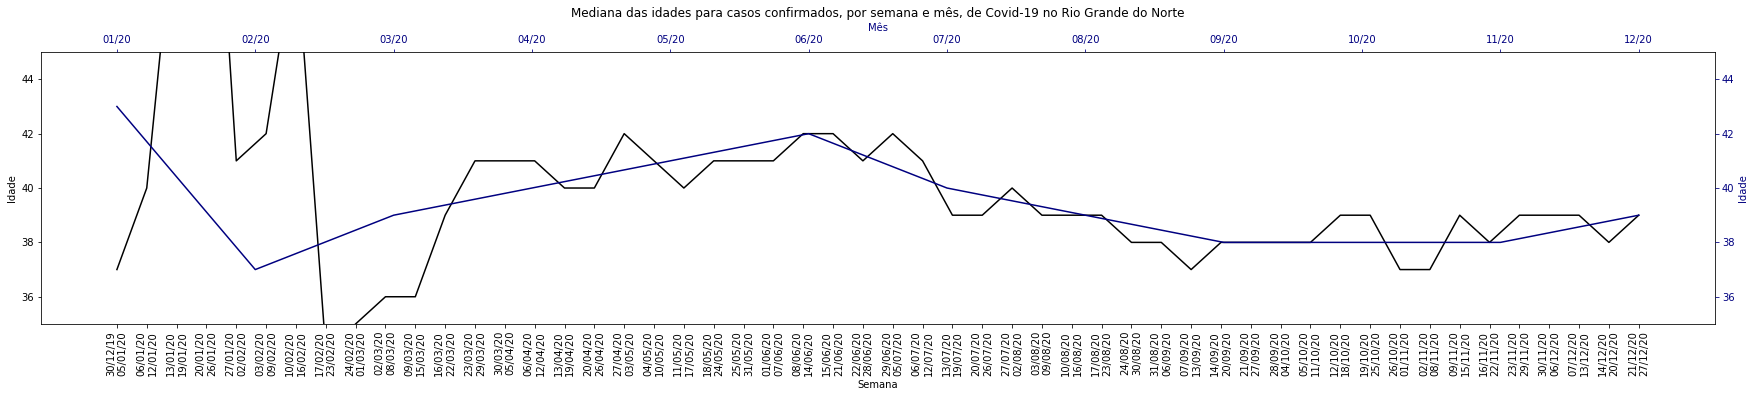

In [ ]:
fig=plt.figure(figsize=[30,5])
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(table_epid_mini_semana['DATA_EPIDEMIOLOGICA'], table_epid_mini_semana['IDADE'],color="black")
ax.set_xlabel("Semana")
ax.set_ylabel("Idade")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_ylim([35,45])

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax2.plot(table_epid_mini_mes['DATA_EPIDEMIOLOGICA'], table_epid_mini_mes['IDADE'], color="navy")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylim([35,45])
ax2.tick_params(axis='x', colors="navy")
ax2.tick_params(axis='y', colors="navy")
ax2.set_xlabel('Mês', color="navy")
ax2.set_ylabel('Idade', color="navy")
plt.title('Mediana das idades para casos confirmados, por semana e mês, de Covid-19 no Rio Grande do Norte')
plt.savefig(folder+'mediana_idade.eps', format='eps')
plt.show()

### Óbitos Confirmados

#### Quantidade Total

##### Faixa Etária: de 5 em 5 anos

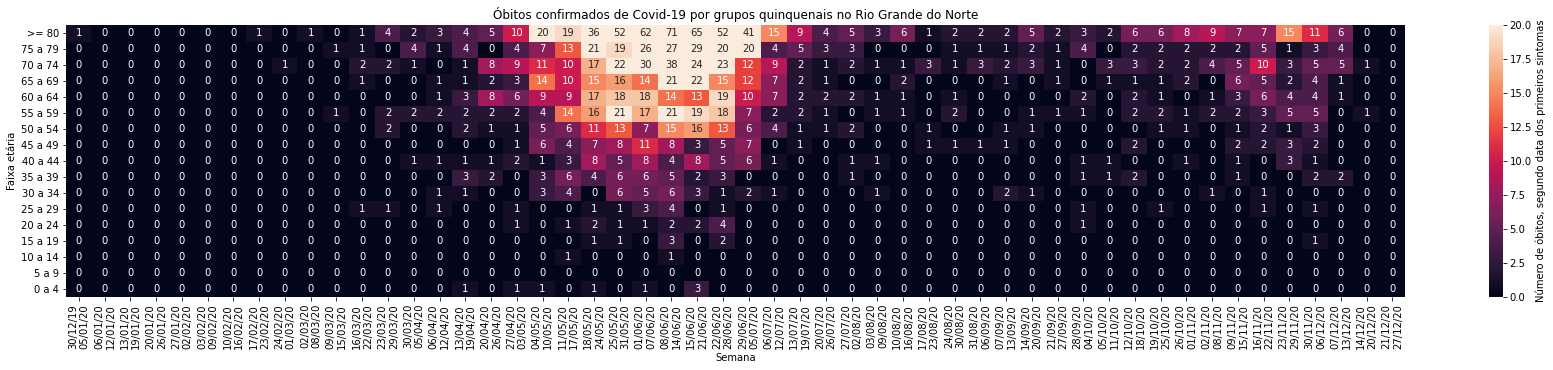

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(30,5))
ax = sns.heatmap(table_mini, annot=True, fmt='d', cbar_kws={'label': 'Número de óbitos, segundo data dos primeiros sintomas'}, vmin=0, vmax=20)
ax.invert_yaxis()
plt.title("Óbitos confirmados de Covid-19 por grupos quinquenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.savefig(folder+'obitosnum_05_heat_2312c.eps', format='eps')
plt.show(ax)

##### Faixa Etária: de 10 em 10 anos

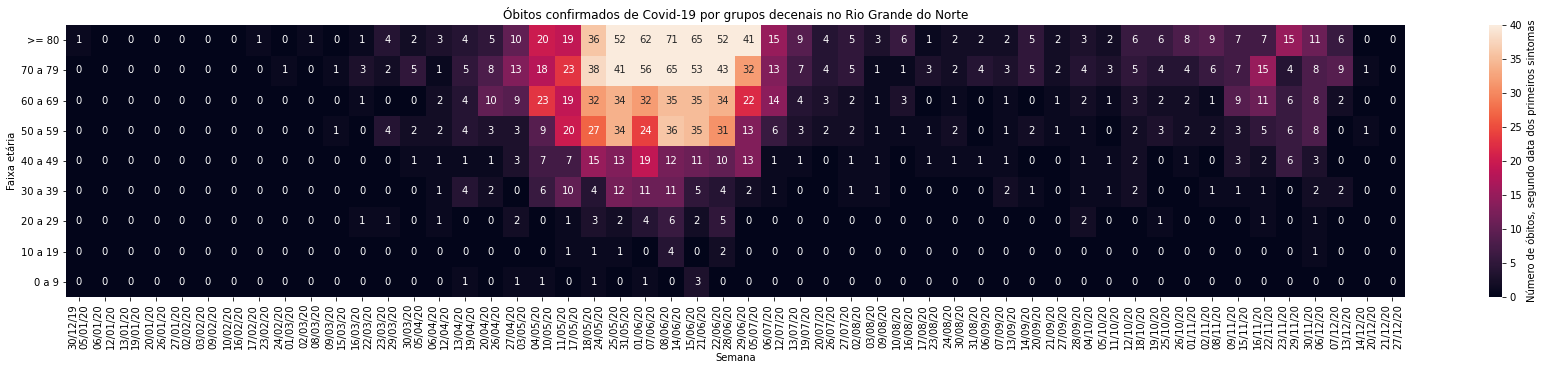

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(30,5))
ax = sns.heatmap(table_mini, annot=True, fmt='d', cbar_kws={'label': 'Número de óbitos, segundo data dos primeiros sintomas'},vmin=0, vmax=40)
ax.invert_yaxis()
plt.title("Óbitos confirmados de Covid-19 por grupos decenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Quantidade Total Normalizada

##### Faixa Etária: de 5 em 5 anos

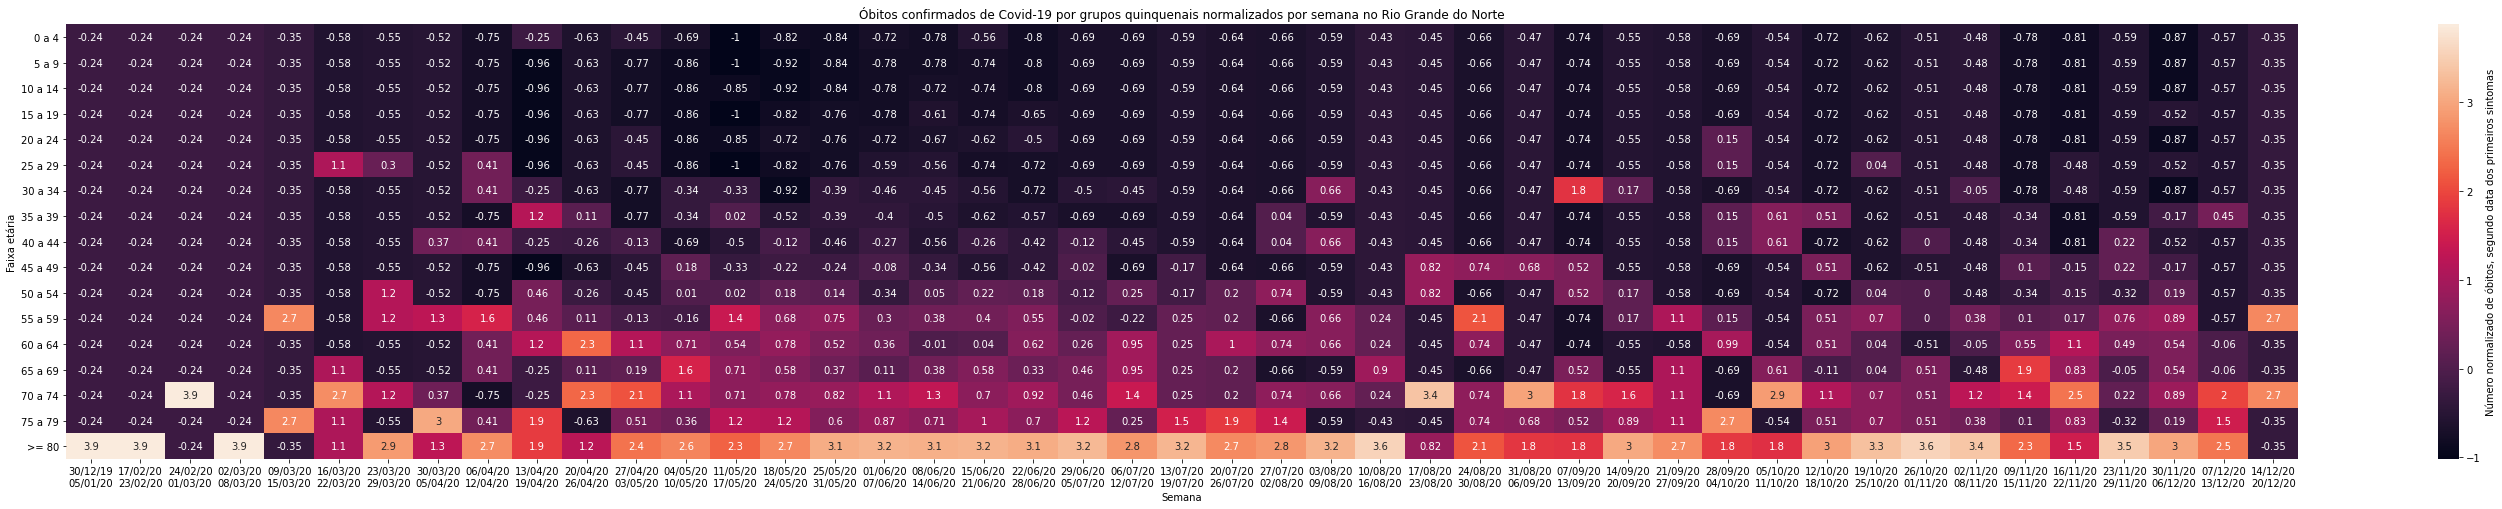

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Normalizar
table_mini_norm = table_mini.apply(normalizarColunas, axis=0)
table_mini_norm = table_mini_norm.round(2)

# Remover nulos
table_mini_norm.dropna(axis=1, inplace=True)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,8))
ax = sns.heatmap(table_mini_norm, annot=True, cbar_kws={'label': 'Número normalizado de óbitos, segundo data dos primeiros sintomas'})
plt.title("Óbitos confirmados de Covid-19 por grupos quinquenais normalizados por semana no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

##### Faixa Etária: de 10 em 10 anos

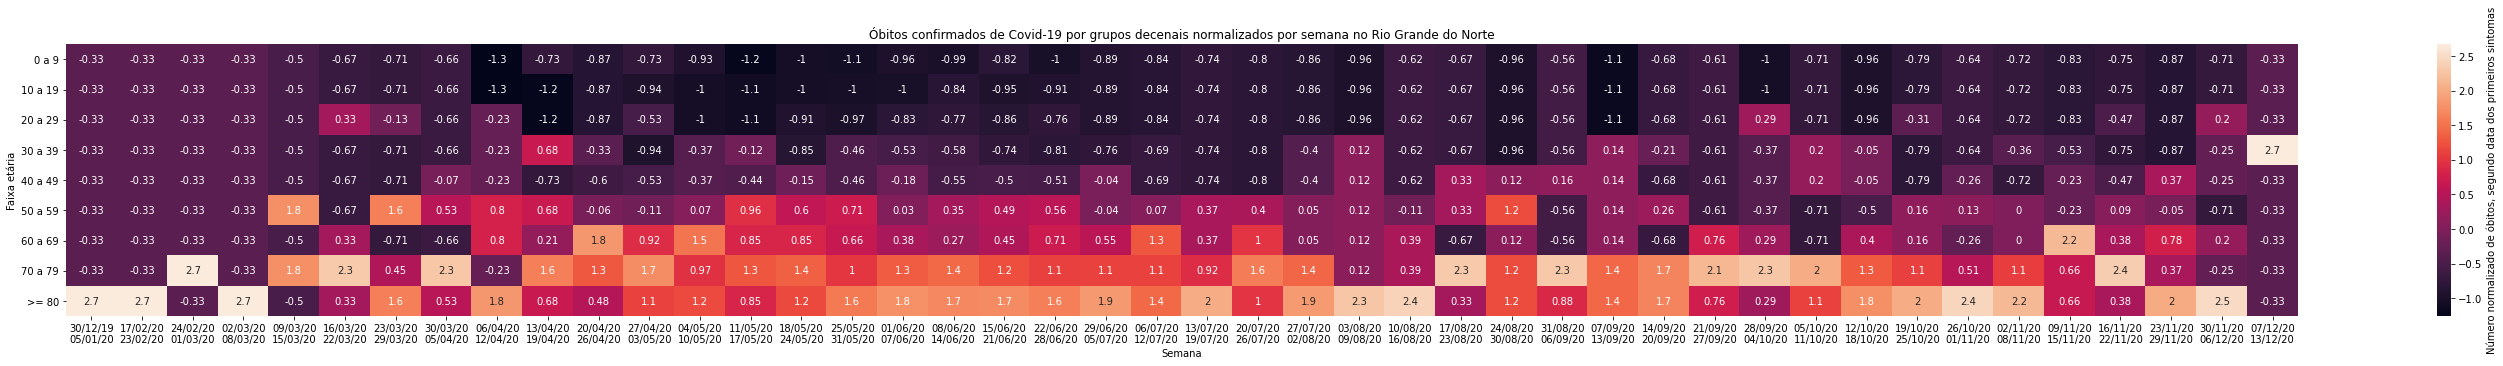

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Normalizar
table_mini_norm = table_mini.apply(normalizarColunas, axis=0)
table_mini_norm = table_mini_norm.round(2)

# Remover nulos
table_mini_norm.dropna(axis=1, inplace=True)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini_norm, annot=True, cbar_kws={'label': 'Número normalizado de óbitos, segundo data dos primeiros sintomas'})
plt.title("Óbitos confirmados de Covid-19 por grupos decenais normalizados por semana no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Taxa por Faixa Etária

##### Faixa Etária: de 5 em 5 anos

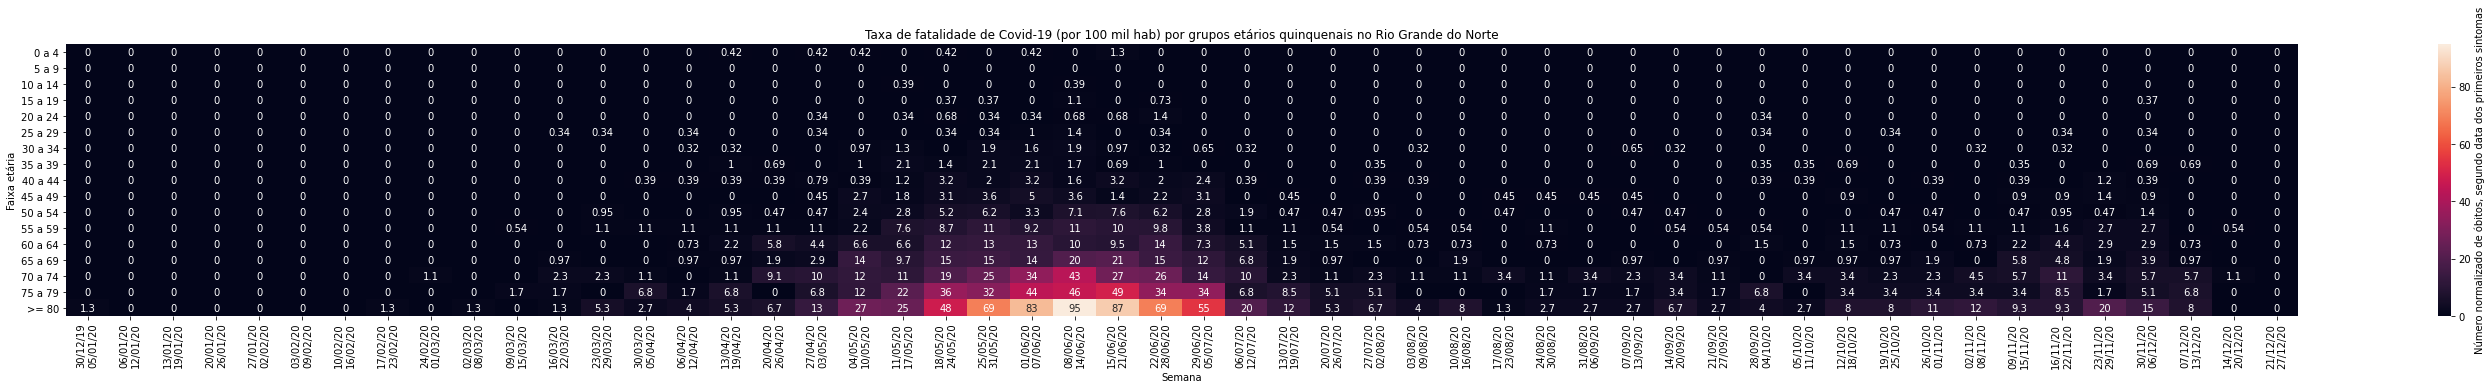

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_5["DATA_EPIDEMIOLOGICA"] = data_epid_analises_5['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_5['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_5['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_5.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')
sorter = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74','75 a 79','>= 80']
table_mini.index = table_mini.index.astype("category")
table_mini.index = table_mini.index.set_categories(sorter)
table_mini.sort_index(inplace=True)

# Proporção
for column in table_mini.columns:
  table_mini[column] = table_mini[column].values/dist_faixa_etaria_5['populacao_residente'].values * 100000
table_mini = table_mini.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini, annot=True, cbar_kws={'label': 'Número normalizado de óbitos, segundo data dos primeiros sintomas'})
plt.title("Taxa de fatalidade de Covid-19 (por 100 mil hab) por grupos etários quinquenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

##### Faixa Etária: de 10 em 10 anos

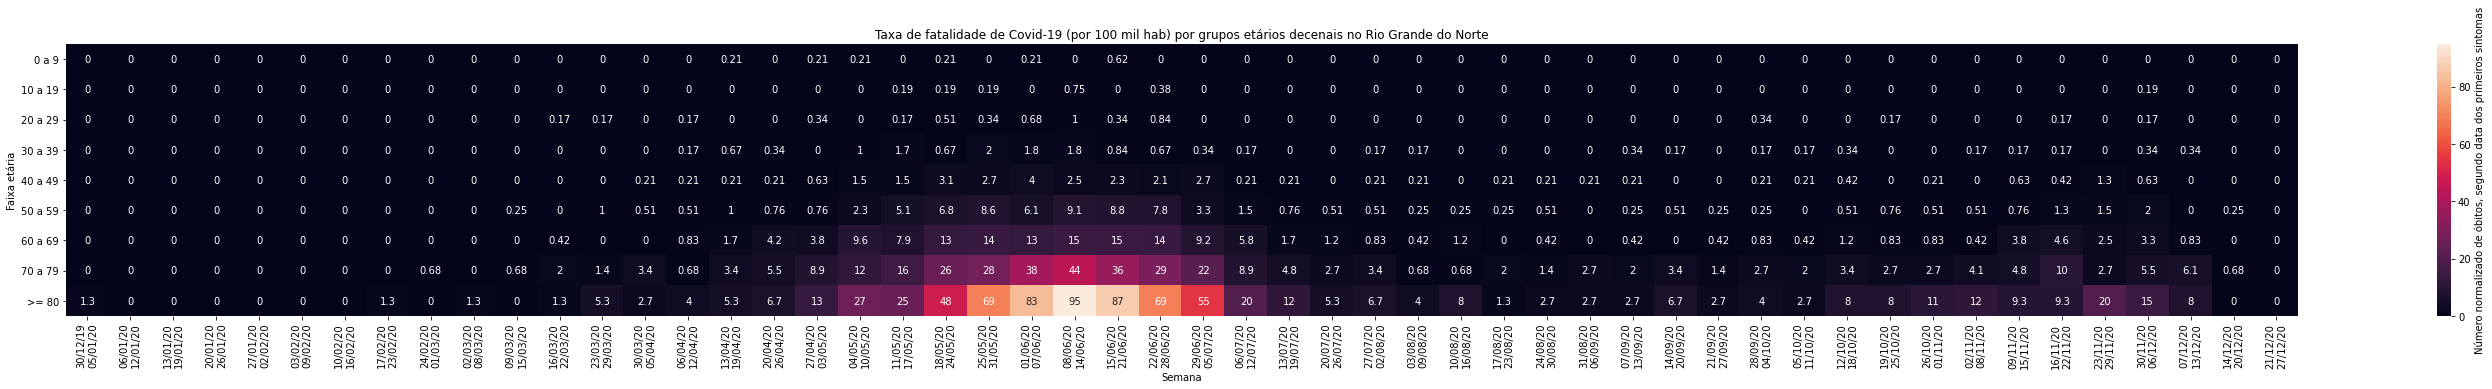

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises_10["DATA_EPIDEMIOLOGICA"] = data_epid_analises_10['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises_10['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises_10['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises_10.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
table_epid_mini = data_epid_mini.pivot_table(index=['DATA_EPIDEMIOLOGICA','FAIXA_ETARIA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_epid_mini = table_epid_mini.reset_index()
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = table_epid_mini.groupby(['FAIXA_ETARIA', pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON')])['OBITO_POSITIVO'].sum().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.reset_index(drop=True, inplace=True)

# Criar tabela heatMap
table_mini = table_epid_mini.reset_index().groupby(['FAIXA_ETARIA', 'DATA_EPIDEMIOLOGICA'])['OBITO_POSITIVO'].aggregate('first').unstack()
table_mini.columns = table_mini.columns.strftime('%d/%m/%y') + '\n' + (table_mini.columns + timedelta(days=6)).strftime('%d/%m/%y')
table_mini.fillna(0, inplace=True)
table_mini = table_mini.astype('int64')

# Proporção
for column in table_mini.columns:
  table_mini[column] = table_mini[column].values/dist_faixa_etaria_10['populacao_residente'].values * 100000
table_mini = table_mini.round(2)

# Criar e Exibir Grafico
fig, ax = plt.subplots(figsize=(50,5))
ax = sns.heatmap(table_mini, annot=True, cbar_kws={'label': 'Número normalizado de óbitos, segundo data dos primeiros sintomas'})
plt.title("Taxa de fatalidade de Covid-19 (por 100 mil hab) por grupos etários decenais no Rio Grande do Norte")
plt.xlabel("Semana")
plt.ylabel("Faixa etária")
plt.show(ax)

#### Mediana do número de óbitos confirmados por idade

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises["DATA_EPIDEMIOLOGICA"] = data_epid_analises['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises.sort_values('DATA_EPIDEMIOLOGICA')
data_epid_mini["DATA_EPIDEMIOLOGICA"] = data_epid_mini['DATA_EPIDEMIOLOGICA'].dt.strftime('%m/%y')

# Criar tabela principal
data_epid_mini = data_epid_mini[data_epid_mini['OBITO_POSITIVO'] == True]
data_epid_mini = data_epid_mini[data_epid_mini['IDADE'] != 'NI']
data_epid_mini.dropna(axis=0, inplace=True)
data_epid_mini = data_epid_mini.astype({'IDADE':'int64'})
table_epid_mini = data_epid_mini.groupby('DATA_EPIDEMIOLOGICA')['IDADE'].median().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini = table_epid_mini.astype({'IDADE':'int64'})
table_epid_mini.reset_index(drop=True, inplace=True)

table_epid_mini_mes = table_epid_mini

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises["DATA_EPIDEMIOLOGICA"] = data_epid_analises['DATA_SINTOMAS_COLETA'].apply(microsoft_to_iso8601)
data_epid_analises['DATA_EPIDEMIOLOGICA'] =  pd.to_datetime(data_epid_analises['DATA_EPIDEMIOLOGICA'])
data_epid_mini = data_epid_analises.sort_values('DATA_EPIDEMIOLOGICA')

# Criar tabela principal
data_epid_mini = data_epid_mini[data_epid_mini['OBITO_POSITIVO'] == True]
data_epid_mini = data_epid_mini[data_epid_mini['IDADE'] != 'NI']
data_epid_mini.dropna(axis=0, inplace=True)
data_epid_mini = data_epid_mini.astype({'IDADE':'int64'})
data_epid_mini['DATA_EPIDEMIOLOGICA'] = data_epid_mini['DATA_EPIDEMIOLOGICA'] - pd.to_timedelta(7, unit='d')
table_epid_mini = data_epid_mini.groupby(pd.Grouper(key='DATA_EPIDEMIOLOGICA', freq='W-MON'))['IDADE'].median().reset_index().sort_values('DATA_EPIDEMIOLOGICA')
table_epid_mini.dropna(axis=0, inplace=True)
table_epid_mini = table_epid_mini.astype({'IDADE':'int64'})
table_epid_mini.reset_index(drop=True, inplace=True)
table_epid_mini['DATA_EPIDEMIOLOGICA'] = table_epid_mini['DATA_EPIDEMIOLOGICA'].dt.strftime('%d/%m/%y') + '\n' + (table_epid_mini['DATA_EPIDEMIOLOGICA'] + timedelta(days=6)).dt.strftime('%d/%m/%y')

table_epid_mini_semana = table_epid_mini

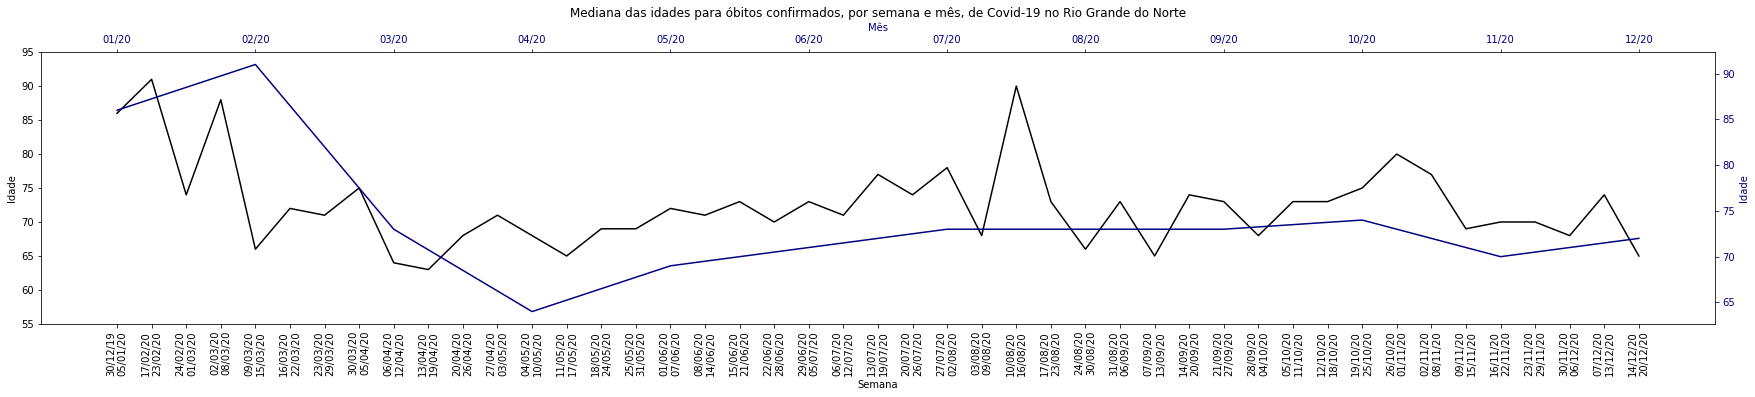

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=[30,5])
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(table_epid_mini_semana['DATA_EPIDEMIOLOGICA'], table_epid_mini_semana['IDADE'],color="black")
ax.set_xlabel("Semana")
ax.set_ylabel("Idade")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_ylim([55,95])

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax2.plot(table_epid_mini_mes['DATA_EPIDEMIOLOGICA'], table_epid_mini_mes['IDADE'], color="navy")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.tick_params(axis='x', colors="navy")
ax2.tick_params(axis='y', colors="navy")
#ax2.set_ylim([55,95])
ax2.set_xlabel('Mês', color="navy")
ax2.set_ylabel('Idade', color="navy")
plt.title('Mediana das idades para óbitos confirmados, por semana e mês, de Covid-19 no Rio Grande do Norte')

plt.show()